# Advanced Visualisation with ggplot2

* Author: Johannes Maucher
* Last Update: 2017-05-12
* References:
    * R in Action, Chapter 19
    * R for Data Science, Chapter 3
    * [ggplot2 Reference Guide](http://ggplot2.tidyverse.org/reference/).
* Topics of this notebook
    * Visualization with ggplot2.
 

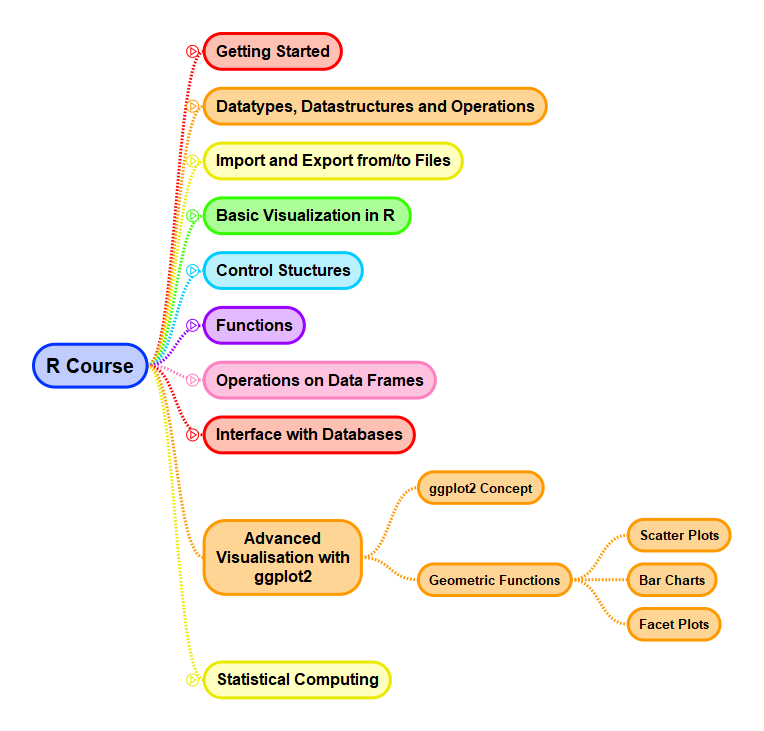

In [1]:
library("IRdisplay")
display_png(file="../../../Pics/DSRggplot2.PNG",width=900) 

## Concept of ggplot2
In the introduction chapter of this course R's base package for visualisations has been introduced and applied. The base visualisation package is contained in the base installation of R and need not be explicitly loaded. There are several other R packages around, which extend the capabilities of R's base visualisation package. Maybe the most important of these packages is ggplot2. This package is not contained in the base installation and it must be explicitly loaded to be used in a R script. The ggplot2 package provides a comprehensive, grammar-based system for generating graphs in a unified and coherent manner. 
 
Install and load ggplot2:

In [1]:
#install.packages("ggplot2")
library(ggplot2)

<a id="mainconcepts"></a>

The main concept of ggplot2's grammer is:
1. First a plot is initialized by the **ggplot()-function**. The arguments of this function specify the data source and optionally the variables, which shall be used. However, this function does not plot any line or point, it just initializes an empty plot. For example **ggplot(data=energyData)** initializes a plot, in which variables of the dataframe *energyData* can be plotted.
2. After the initialization one or more geometric objects can be added by a **+** symbol. These objects are added by so called *geom functions* or just *geoms*. There exist geom functions for a vast variety of different plots, e.g. scatter-plots, line-graphs, box-plots, bar-plots, histograms, etc. For example 

        ggplot(data=energyData)+ 
        geom_point(mapping=aes(x=Total2009,y=CO2Emm)) 

    first initializes an empty plot and then adds a scatter-plot in which the variable *Total2009* is assigned to the x- and the variable *CO2Emm* is assigned to the y-coordinate of the points. Both, *Total2009* and *CO2Emm* are columns of the dataframe *energyData*. 
3. The general ggplot2 grammer for a basic template from which a comprehensive bunch of graphics can be derived is:

        ggplot(data = <DATA>) + 
          <GEOM_FUNCTION>(
             mapping = aes(<MAPPINGS>),
             stat = <STAT>, 
             position = <POSITION>
          ) +
          <COORDINATE_FUNCTION> +
          <FACET_FUNCTION>
          
      This template takes seven parameters, but not all of them must be configured by the user. Only the parameters &lt;DATA&gt;, &lt;GEOM_FUNCTION&gt; and &lt;MAPPINGS&gt; must be explicitely assigned. The others are allready assigned by useful defaults and must only be configured, if non-default functionality is required. Note that ggplot2 provides much more than these seven parameters. An overview of parameters and their values is given e.g. in the [ggplot2 Reference](http://ggplot2.tidyverse.org/reference/index.html). The 7 parameters of our basic template above are described and applied in this notebook.
      

## Geometric Functions

As already mentioned, one or more **geometric functions (geoms)** can be attached to a plot. The most important geoms are: 

| geometric function 	| Comment         	|   ------------------    | geometric function 	| Comment         	|
|:------------------:	|-----------------	|-------|--------------------	|------------------	|
| geom_bar()         	| Bar chart       	|   	| geom_line()        	| Line graph       	|
| geom_boxplot()     	| Box plot        	|   	| geom_point()       	| Scatter plot     	|
| geom_density()     	| Density plot    	|   	| geom_rug()         	| Rug plot         	|
| geom_histogram()   	| Histogram       	|   	| geom_smooth()      	| Fitted line      	|
| geom_hline()       	| Horizontal line 	|   	| geom_text()        	| Text annotations 	|
| geom_jitter()      	| Jittered points 	|   	| geom_violine()     	| Violin plot      	|
|                    	|                 	|   	| geom_vline()       	| Vertical line    	|

Each of the geometric functions is typically specified by a set of **options**. A set of common options is specified in the table below. Not all options are applicable to all geometric functions. The application of these functions is demonstrated in this notebook.

|  option  	| Comment                                                                                                                                                                                                                                                                                               	|
|:--------:	|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| color    	| Color of points, lines, and borders around filled regions                                                                                                                                                                                                                                             	|
| fill     	| Color of filled areas such as bars and density regions                                                                                                                                                                                                                                                 	|
| alpha    	| Transparencyof colors, ranging from 0 (fully transparent) to 1 (opaque)                                                                                                                                                                                                                               	|
| linetype 	| Pattern for lines (1 = solid, 2 = dashed, 3 = dotted, 4 = dotdash, 5 = longdash, 6 = twodash)                                                                                                                                                                                                         	|
| size     	| Point size and line width                                                                                                                                                                                                                                                                             	|
| shape    	| Point shapes (same as pch, with 0 = open square, 1 = open circle, 2 = open triangle, and so on)                                                                                                                                                                                                       	|
| position 	| Position of plotted objects such as bars and points. For bars, "dodge" places grouped bar charts side by side, "stacked" vertically stacks grouped bar charts, and "fill" vertically stacks grouped bar charts and standardizes their heights to be equal. For points, "jitter" reduces point overlap 	|
| binwidth 	| Bin width for histograms                                                                                                                                                                                                                                                                              	|
| notch    	| Indicates whether box plots should be notched (TRUE/FALSE).                                                                                                                                                                                                                                           	|
| sides    	| Placement of rug plots on the graph ("b" = bottom, "l" = left, "t" = top, "r" = right, "bl" = both bottom and left, and so on)                                                                                                                                                                        	|
| width    	| Width of box plots                                                                                                                                                                                                                                                                                    	|

## Load example data

### Load energy data

In [2]:
energyData=read.csv(file="../data/EnergyMixGeo.csv", header=TRUE, sep=",",row.names=1)
sapply(energyData,mode)

Country       Oil       Gas      Coal   Nuclear     Hydro Total2009    CO2Emm 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
      Lat      Long 
"numeric" "numeric"

### First data inspection
Once a new and unknown dataset is loaded one should first try to get a general idea of the data. Which instances are described by which features? How manyinstances and features are contained in the dataset? What is the general data-structure and -format? How clean is the data? Common approaches to solve this high-level questions are:

 * Print some datasamples
 * Calculate descriptive statistics
 * Visualize data, in particular descriptive statistics

We start by printing the head rows and the shape of the dataframe:

In [4]:
head(energyData)
shapeEnergy <- dim(energyData)
print(paste("Number of rows: ",shapeEnergy[1]))
print(paste("Number of columns: ",shapeEnergy[2]))

,Country,Oil,Gas,Coal,Nuclear,Hydro,Total2009,CO2Emm,Lat,Long
0,US,842.9,588.7,498.0,190.2,62.2,2182.0,5941.9,37.09024,-95.71289
1,Canada,97.0,85.2,26.5,20.3,90.2,319.2,602.7,56.13037,-106.34677
2,Mexico,85.6,62.7,6.8,2.2,6.0,163.2,436.8,23.63450,-102.55278
3,Argentina,22.3,38.8,1.1,1.8,9.2,73.3,164.2,-38.41610,-63.61667
4,Brazil,104.3,18.3,11.7,2.9,88.5,225.7,409.4,-14.23500,-51.92528
5,Chile,15.4,3.0,4.1,0.0,5.6,28.1,70.3,-35.67515,-71.54297


[1] "Number of rows:  65"
[1] "Number of columns:  10"


A summary of the main descriptive statistics of each column in a dataframe can be obtained by the *summary()*-function. As the following example shows, for non-numeric columns the count of each value in the column is calculated. For numeric columns the minimum, maximum, mean and three quantiles are returned by the *summary()*-function.

In [ ]:
summary(energyData)

### Load and inspect data on video game sales and ratings
This dataset is publicly available from here: [Video Game Dataset](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings)

In [6]:
gamesData=read.csv(file="../data/VideoGamesSales-22-12-2016.csv", header=TRUE, sep=",")

In [7]:
head(gamesData)

Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E
Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NA,NA,,NA,,
Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NA,NA,,NA,,
Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NA,NA,,NA,,


In [8]:
summary(gamesData)

                          Name          Platform    Year_of_Release
 Need for Speed: Most Wanted:   12   PS2    :2161   2008   :1427   
 FIFA 14                    :    9   DS     :2152   2009   :1426   
 LEGO Marvel Super Heroes   :    9   PS3    :1331   2010   :1255   
 Madden NFL 07              :    9   Wii    :1320   2007   :1197   
 Ratatouille                :    9   X360   :1262   2011   :1136   
 Angry Birds Star Wars      :    8   PSP    :1209   2006   :1006   
 (Other)                    :16663   (Other):7284   (Other):9272   
          Genre                             Publisher        NA_Sales      
 Action      :3370   Electronic Arts             : 1356   Min.   : 0.0000  
 Sports      :2348   Activision                  :  985   1st Qu.: 0.0000  
 Misc        :1750   Namco Bandai Games          :  939   Median : 0.0800  
 Role-Playing:1500   Ubisoft                     :  933   Mean   : 0.2633  
 Shooter     :1323   Konami Digital Entertainment:  834   3rd Qu.: 0.2400  


### Load and inspect human resource data
[Human Resources Analytics Data](https://www.kaggle.com/ludobenistant/hr-analytics)

In [9]:
hrData=read.csv(file="../data/humanResources.csv", header=TRUE, sep=",")
hrData$left<-factor(hrData$left)

In [10]:
hrData

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0.38,0.53,2,157,3,0,1,0,sales,low
0.80,0.86,5,262,6,0,1,0,sales,medium
0.11,0.88,7,272,4,0,1,0,sales,medium
0.72,0.87,5,223,5,0,1,0,sales,low
0.37,0.52,2,159,3,0,1,0,sales,low
0.41,0.50,2,153,3,0,1,0,sales,low
0.10,0.77,6,247,4,0,1,0,sales,low
0.92,0.85,5,259,5,0,1,0,sales,low
0.89,1.00,5,224,5,0,1,0,sales,low
0.42,0.53,2,142,3,0,1,0,sales,low


In [11]:
summary(hrData)

 satisfaction_level last_evaluation  number_project  average_montly_hours
 Min.   :0.0900     Min.   :0.3600   Min.   :2.000   Min.   : 96.0       
 1st Qu.:0.4400     1st Qu.:0.5600   1st Qu.:3.000   1st Qu.:156.0       
 Median :0.6400     Median :0.7200   Median :4.000   Median :200.0       
 Mean   :0.6128     Mean   :0.7161   Mean   :3.803   Mean   :201.1       
 3rd Qu.:0.8200     3rd Qu.:0.8700   3rd Qu.:5.000   3rd Qu.:245.0       
 Max.   :1.0000     Max.   :1.0000   Max.   :7.000   Max.   :310.0       
                                                                         
 time_spend_company Work_accident    left      promotion_last_5years
 Min.   : 2.000     Min.   :0.0000   0:11428   Min.   :0.00000      
 1st Qu.: 3.000     1st Qu.:0.0000   1: 3571   1st Qu.:0.00000      
 Median : 3.000     Median :0.0000             Median :0.00000      
 Mean   : 3.498     Mean   :0.1446             Mean   :0.02127      
 3rd Qu.: 4.000     3rd Qu.:0.0000             3rd Qu.:0.00000 

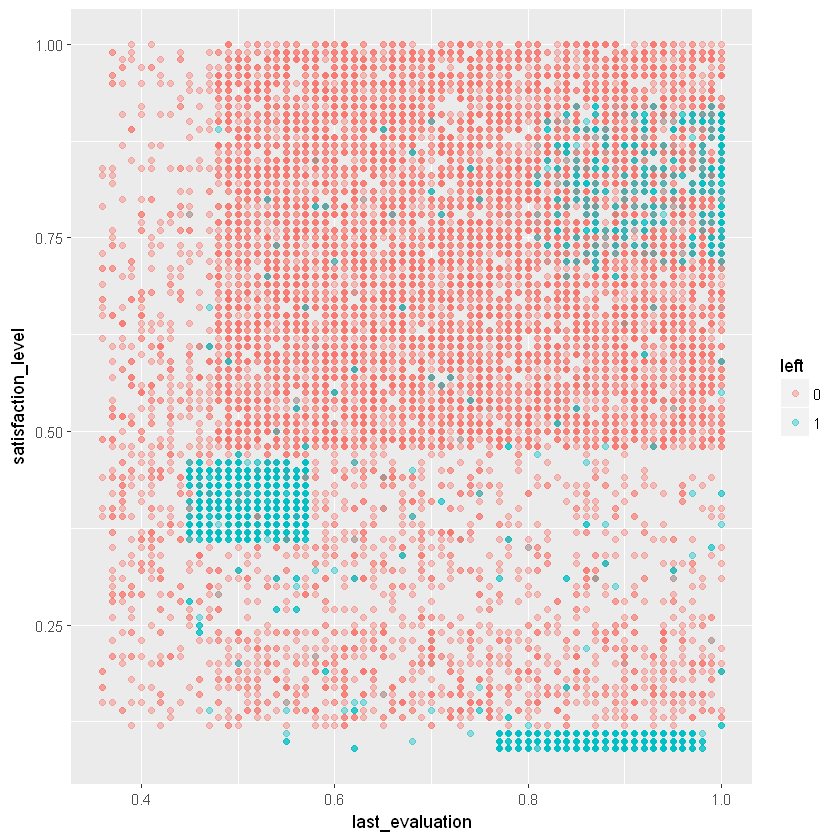

In [12]:
ggplot(data=hrData)+
geom_point(mapping=aes(x=last_evaluation,y=satisfaction_level, color=left),alpha=.4)

## Applying ggplot2() geometric functions


### Scatter Plots
Scatter plots are one of the most used techniques for visualizing 2-dimensional data. In ggplot2 scatter plots are generated by the geometric function **geom_point()** as shown below. In the first row the plot is initialzied. In the second row the scatter plot is attached to the initialized plot-object. Within the *aes()*-function, which is assigned to the *mapping*-argument, the data assigned to the x- and y-axis is defined. Further arguments can be specified for the color, size and type of the markers. 

#### CO2 Emmission versus Total Energy Consumption
In the plot below, the x-coordinate of each point describes a country's total energy consumption per year (in Megatons Oil Equivalent) and the y-coordinate contains the total CO2Emmission in Megatons.

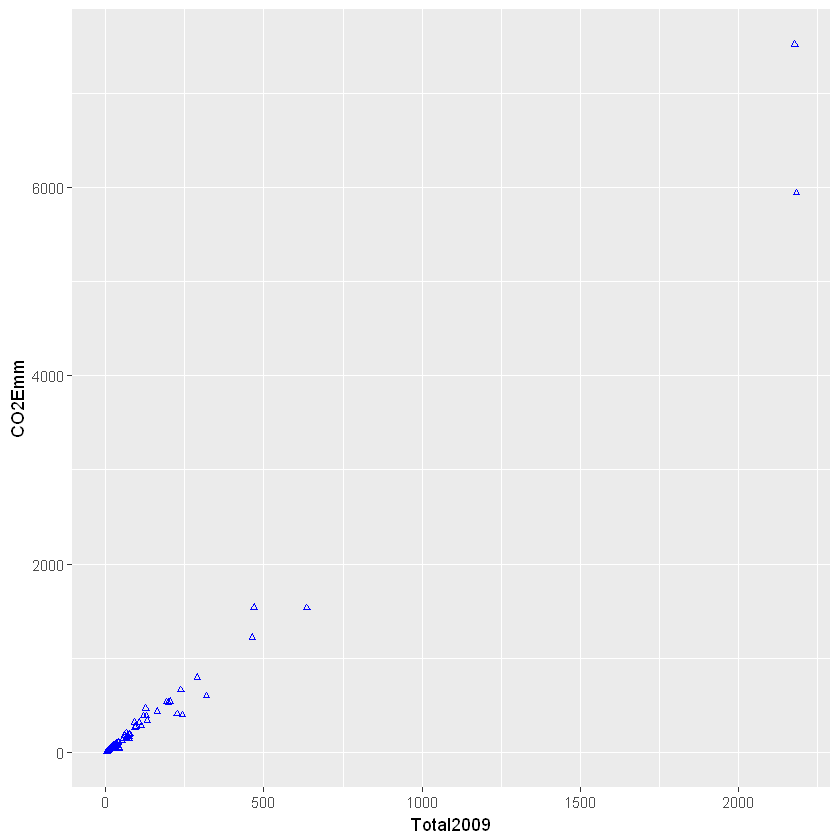

In [13]:
ggplot(data=energyData)+
geom_point(mapping=aes(x=Total2009,y=CO2Emm),color="blue",size=1,shape=2)

The scatter plot above shows, that there are 2 outliers, i.e. countries with a much larger energy consumption and CO2 emmission than all others. In a scatter plot such outliers cause that the variations within the set of non-outliers appear vanishing. In order to avoid this the entire data set is often partitioned into a non-outlier- and an outlier-part. In all of the following visualizations of energyData only the subset of non-outliers is regarded. This subset is assigned to *energyDataRed* and can be extracted from the entire *energyData* set, by applying a filter rule on the total energy consumption attribute: 

In [14]:
energyDataRed<-energyData[energyData$Total2009<750,]

The scatter plot below contains only the non-outliers. Moreover, since the plot above already indicates that the CO2-Emmission increases with increasing total energy consumptions, a linear regression line is plotted in addition to the datapoints. Regression lines like this can easily be plotted by the *geom_smooth()*-function.

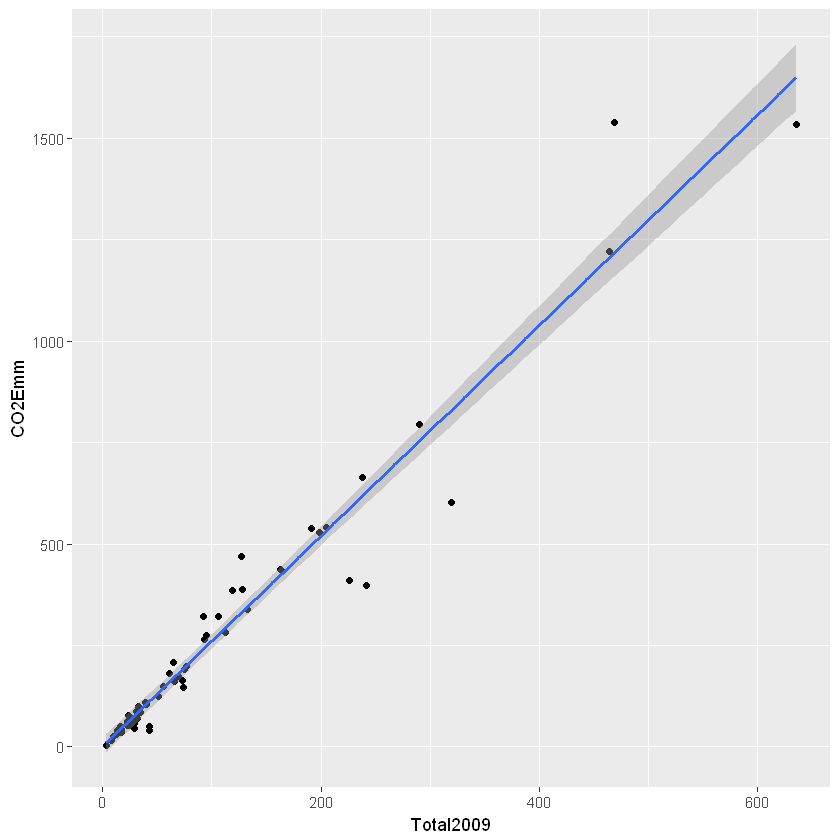

In [15]:
ggplot(data=energyDataRed) +
    geom_point(mapping=aes(x=Total2009,y=CO2Emm)) +
    geom_smooth(mapping=aes(x=Total2009,y=CO2Emm),method='lm')

Since some points have a high deviation from the regression line, it is clear that total CO2-emmission does not only depend on the total energy consumption, but on the individual energy mix. We expect that a high rate of coal and a high rate of oil yield a disproportionate high amount of CO2 emmission. This hypothesis can be verified e.g. by visualizing the coal- and oil-part of the total energy consumption by size and color, respectively.   

The plot below verifies this hypothesis: Points (countries), which lie effectively above the regression line, have a relatively high oil-energy consumption (blue color) and/or a relatively high coal-energy consumption (large markers).

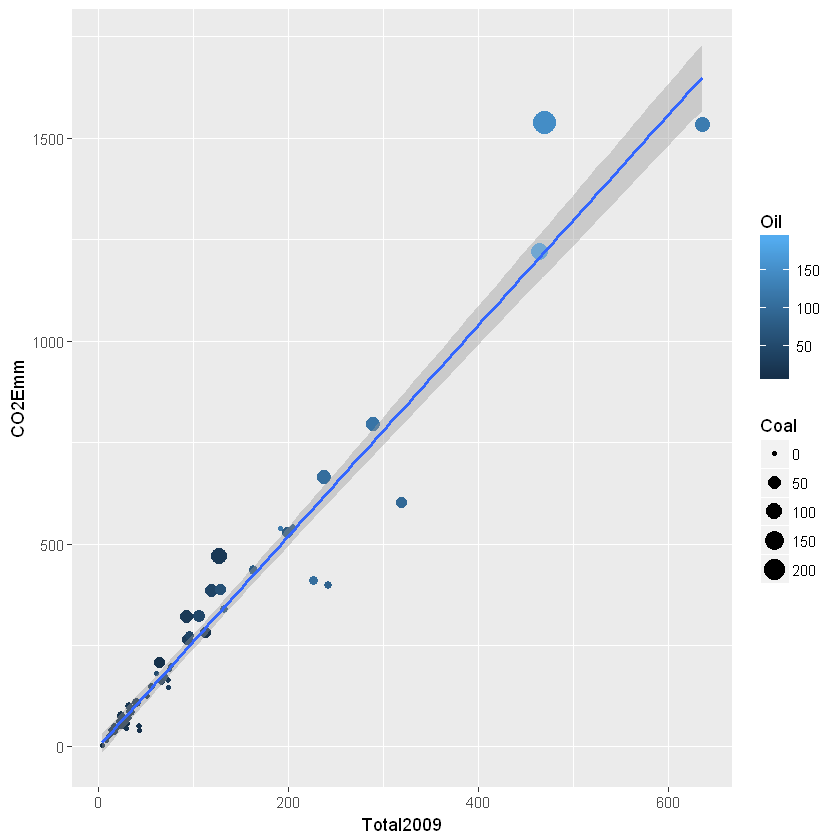

In [16]:
ggplot(data=energyDataRed) +
    geom_point(mapping=aes(x=Total2009,y=CO2Emm,size=Coal,color=Oil)) +
    geom_smooth(mapping=aes(x=Total2009,y=CO2Emm),method='lm')

#### Computer games sales figures in US, EU and Japan

From the dataset on computer games sales figures we like to explore the main differences between the North American-, Japan- and EU market. 

* Are there games, which are bestsellers in one region, but slow sellers in other regions? 
* Is the demand for the distinct game genres the same in all regions, or do people in different regions prefer totally different genres?

First, the EU-sales figures are plotted versus the North American (NA) sales figures in a scatter plot. Each point refers to a specific game. The marker colors indicate the game genre.

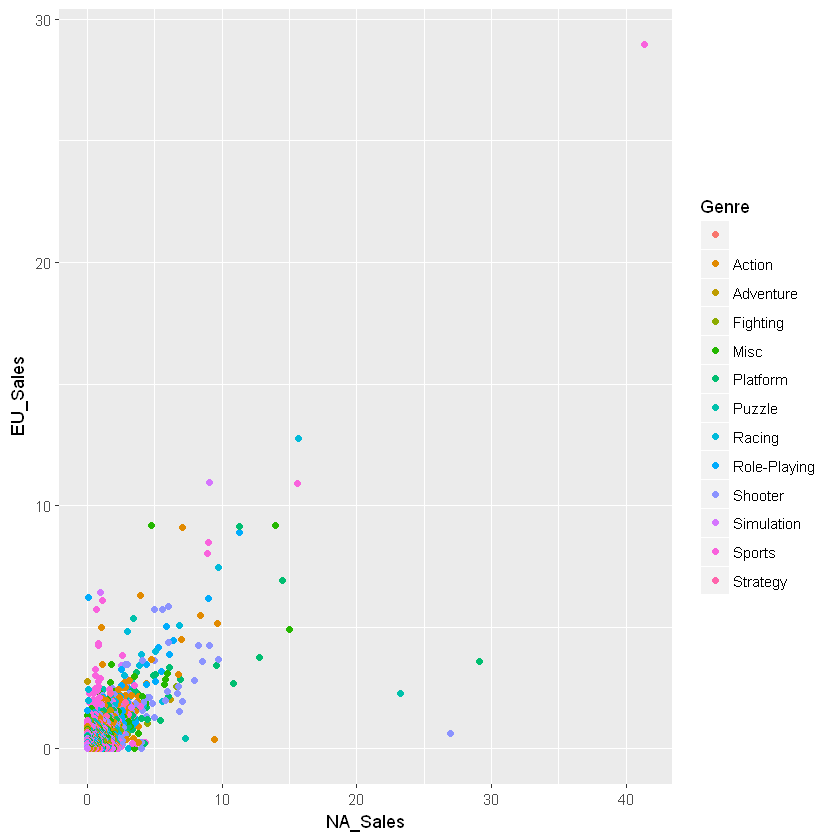

In [17]:
ggplot(data=gamesData)+
geom_point(mapping=aes(x=NA_Sales,y=EU_Sales, color=Genre))

The scatter plot reveals, that there is a very strong outlier, which sells extraordinarily good in NA and EU. Moreover, there are 3 other games, which have high sales figures in NA, but usual figures in EU. We like to find out the name of these outliers. For this we just order the dataframe according to decreasing sales figures in the NA- and EU-market.

In [18]:
gamesData[order(-gamesData$NA_Sales,-gamesData$EU_Sales),]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NA,NA,,NA,,
10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NA,NA,,NA,,
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NA,NA,,NA,,
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E
15,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61,45,6.3,106,Good Science Studio,E
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87,80,8.4,594,Nintendo,E
8,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41,6.6,129,Nintendo,E
19,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,NA,NA,,NA,,


From the ordered dataframe we see, that *Wii Sports* is the top-seller, both in NA- and EU-market. *Super Mario Bros*, *Duck Hunt* and *Tetris* are top-sellers in the NA market, but not extraordinarily popular in Europe.

We exclude these four games as outliers in the further investigation:

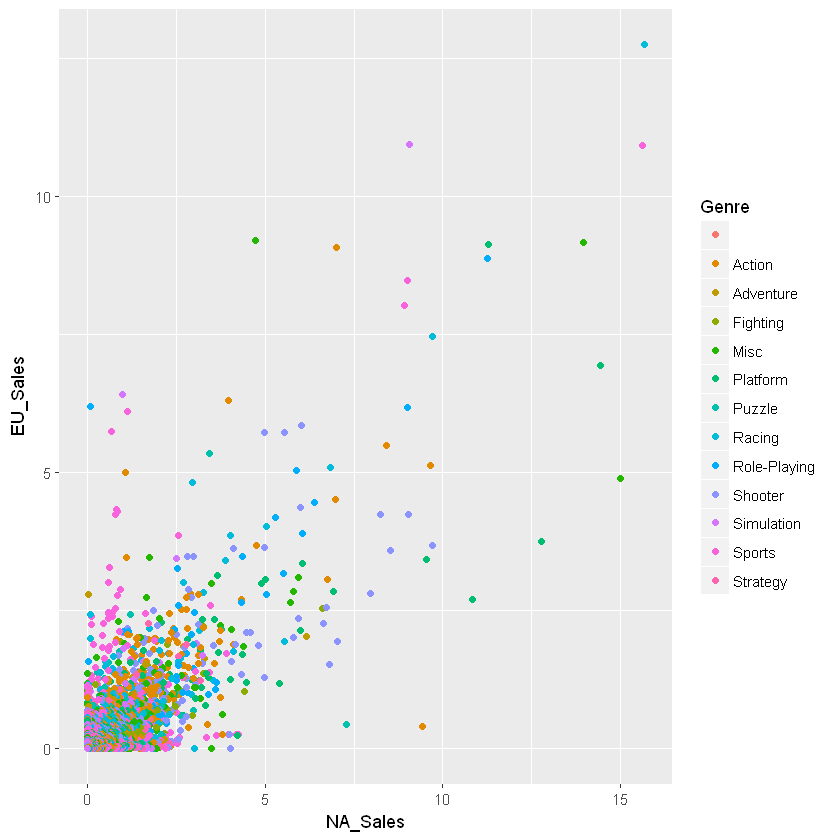

In [19]:
gamesDataRed<-gamesData[gamesData$NA_Sales<23,]
ggplot(data=gamesDataRed)+
geom_point(mapping=aes(x=NA_Sales,y=EU_Sales, color=Genre))

### Facet Plots

At the top of this notebook the [main concepts](#mainconcepts) of ggplot2 have been sketched. The general ggplot2 grammer contains the parameter &lt;FACET_FUNCTION&gt;, which will now be used in order to arrange multiple plots. 

#### Facet_wrap
One possible facet function is *facet_wrap()*. As shown below this function creates for each possible value of the specified parameter (here: *Genre*) a single plot. The number of plots in each row of the plot-matrix can be configured by the parameter *ncol*.

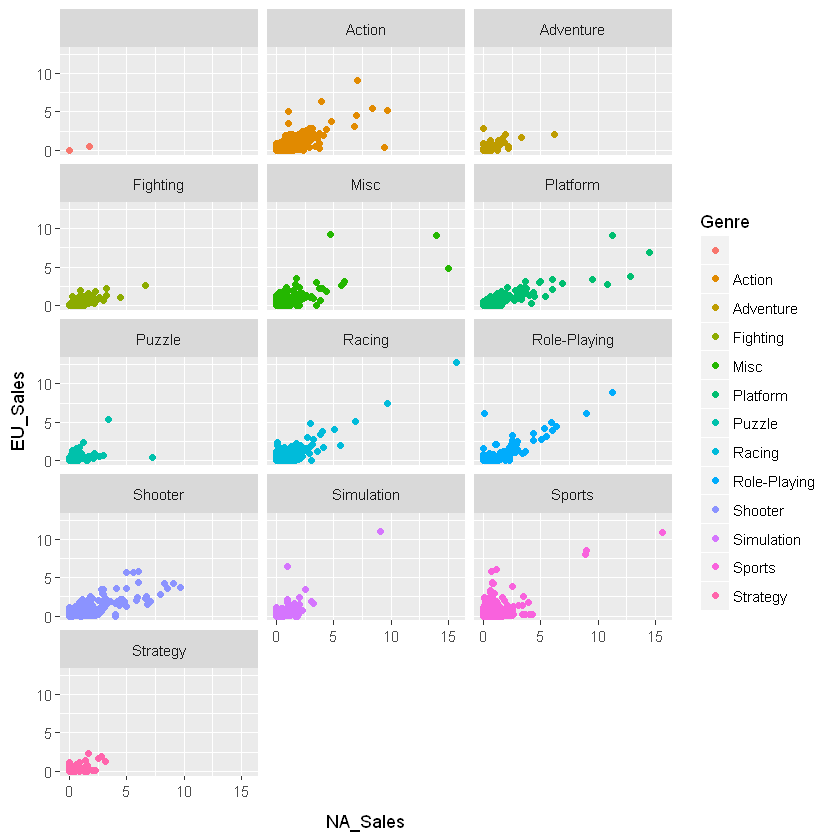

In [20]:
ggplot(data=gamesDataRed)+
    geom_point(mapping=aes(x=NA_Sales,y=EU_Sales,color=Genre))+
    facet_wrap(~ Genre ,ncol=3)

#### Facet_grid
Another widely used facet function is facet_grid(). This function also creates a matrix of plots. The columns of this matrix, as well as the its rows, are defined by the distinct values of variables, which can be passed to the *facet_function()* as paramters. In the example below in each plot the *last_evaluation*-value is plotted versus the *satisfaction*-value. All plots in a row belong to another value of the parameter *salary*. All plots in a column belong to another value of the parameter *left*.

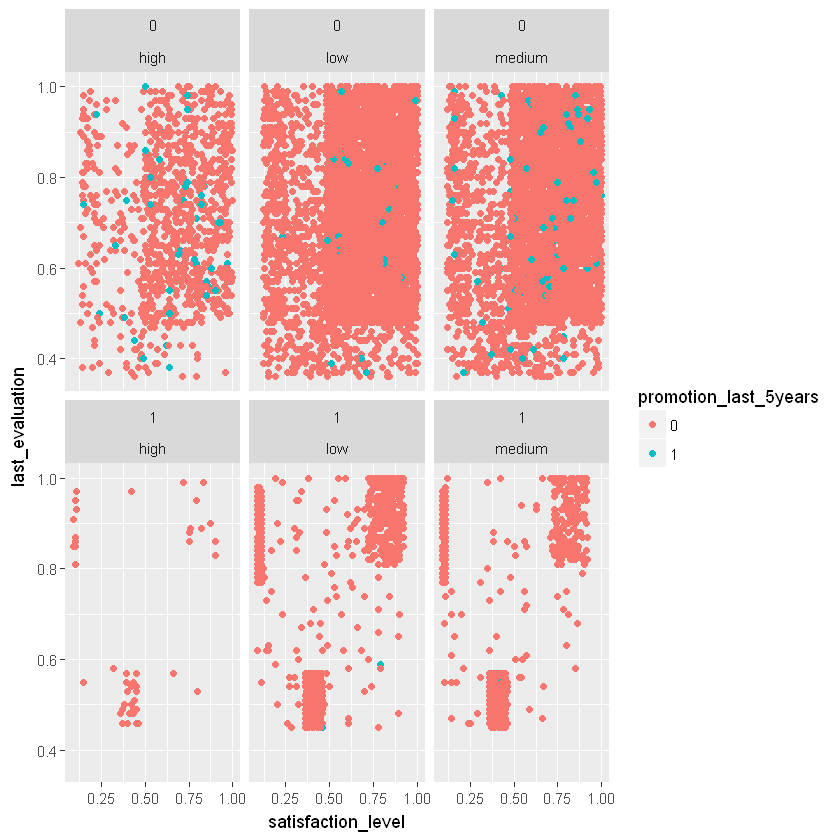

In [25]:
hrData$promotion_last_5years<-factor(hrData$promotion_last_5years)
ggplot(data=hrData)+
geom_point(mapping=aes(x=satisfaction_level,y=last_evaluation,color=promotion_last_5years))+
facet_wrap(left ~ salary)

### Bar Charts

See also [ggplot2 Bar Charts](http://ggplot2.tidyverse.org/reference/geom_bar.html).

#### Bar Charts for Histograms
A histogram determines the distribution of values over a given set of bins, i.e. for each bin the number of values which fall into the bin's range are counted. Histograms are typically visualized by bar-charts.

In R bar-charts are realized by the geometric function *geom_bar()*. In contrast to other geometric functions applied so far, the *mappings*-parameter of *geom_bar* accepts just a single variable for the *x*-axis, which defines the bins. If a categorical variable is passed to *x*, then the discrete values of this parameter defines the bins: Each bin belongs to one value of the variable. Along the *y*-axis by default the count in each bin is plotted. 

In the example below for each genre, the number of games in this genre is plotted in the bar-chart.

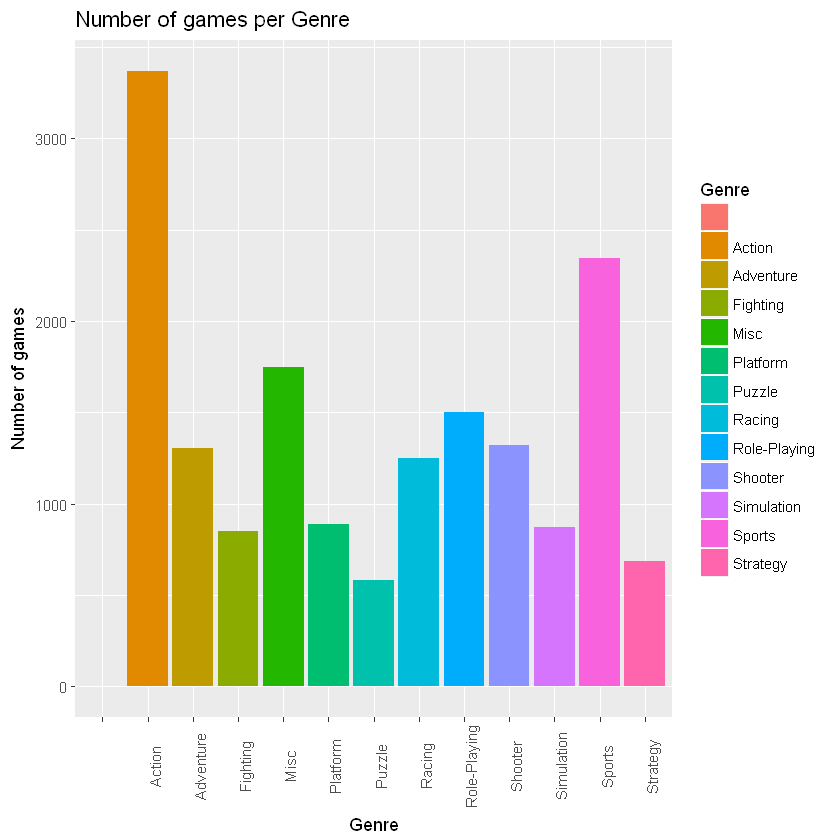

In [27]:
ggplot(data = gamesDataRed) +
  geom_bar(mapping = aes(x = Genre,fill=Genre))+theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Number of games per Genre",x="Genre",y="Number of games")

#### Bar charts for non-Histogram functions
Histograms are a main but not the only application of bar charts. Consider for example the case, that not the count of games per genre, but the total sales in dollars per genre shall be plotted. For this it must be possible to define a parameter which shall be plotted along the *y*-axis. In the default-setting, as applied above, this is not possible, because the *stat*-parameter in the *geom_bar*-function is set to *count* and count of elements per bin is plotted on the *y*-axis.

In order to plot an arbitrary variable along the *y*-axis the *stat*-parameter of *geom_bar()* must be set to *'identity'* as shown in the example below. The *stat*-parameter is one of the seven parameters of the [basic ggplot2-template](#mainconcepts), which is sketched at the top of this notebook. 

[1]              Action       Adventure    Fighting     Misc        
 [6] Platform     Puzzle       Racing       Role-Playing Shooter     
[11] Simulation   Sports       Strategy    
13 Levels:  Action Adventure Fighting Misc Platform Puzzle ... Strategy

[1]    2.42 1745.27  237.69  447.48  803.18  787.84  212.76  728.90  934.40
[10] 1024.63  390.42 1249.47  174.50

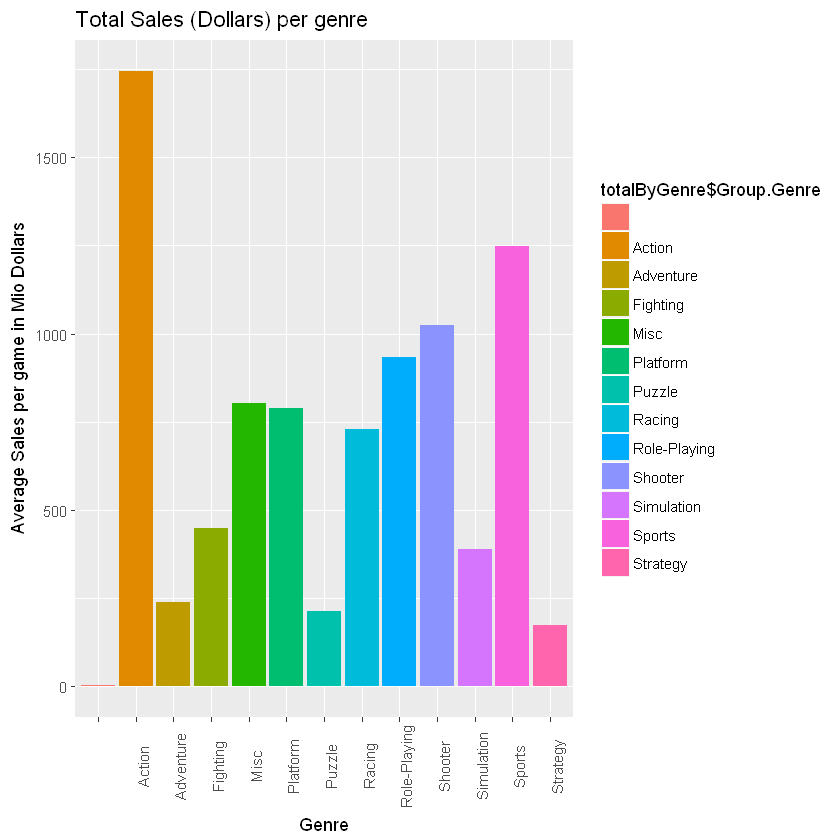

In [38]:
totalByGenre<-aggregate(gamesDataRed$Global_Sales,by=list(Group.Genre=gamesDataRed$Genre),FUN=sum,na.rm=TRUE)
totalByGenre$Group.Genre
totalByGenre$x
ggplot(data = totalByGenre)+
geom_bar(mapping = aes(x = totalByGenre$Group.Genre,y=totalByGenre$x,fill=totalByGenre$Group.Genre),stat="identity")+
theme(axis.text.x = element_text(angle = 90))+
labs(title="Total Sales (Dollars) per genre",x="Genre",y="Average Sales per game in Mio Dollars")

The same plot as above can also be generated by the geometric function *geom_col()*. This function is basically the same as *geom_bar()*, but with another *'identity* as the default setting for the *stat*-parameter:   

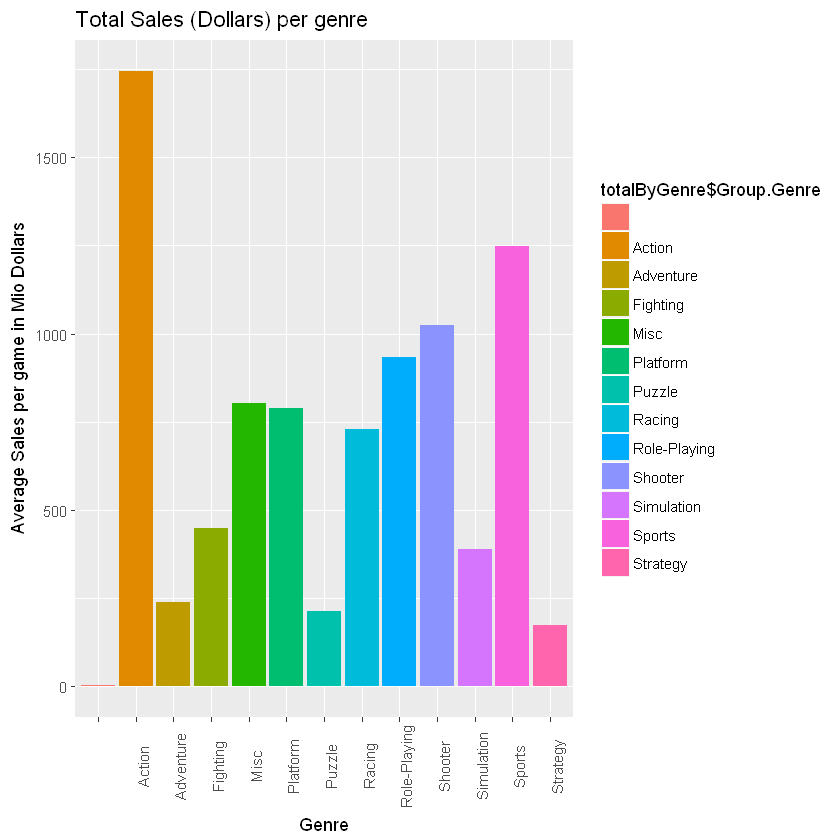

In [30]:
ggplot(data = totalByGenre)+
geom_col(mapping = aes(x = totalByGenre$Group.Genre,y=totalByGenre$x,fill=totalByGenre$Group.Genre))+
theme(axis.text.x = element_text(angle = 90))+
labs(title="Total Sales (Dollars) per genre",x="Genre",y="Average Sales per game in Mio Dollars")

The bar-chart generated below is similiar as the one above, but with the average sales value (in Dollar), instead of the total sales:

[1]              Action       Adventure    Fighting     Misc        
 [6] Platform     Puzzle       Racing       Role-Playing Shooter     
[11] Simulation   Sports       Strategy    
13 Levels:  Action Adventure Fighting Misc Platform Puzzle ... Strategy

[1] 1.2100000 0.5178843 0.1824175 0.5270671 0.4589600 0.8882074 0.3674611
 [8] 0.5835869 0.6229333 0.7750605 0.4467048 0.5323690 0.2554905

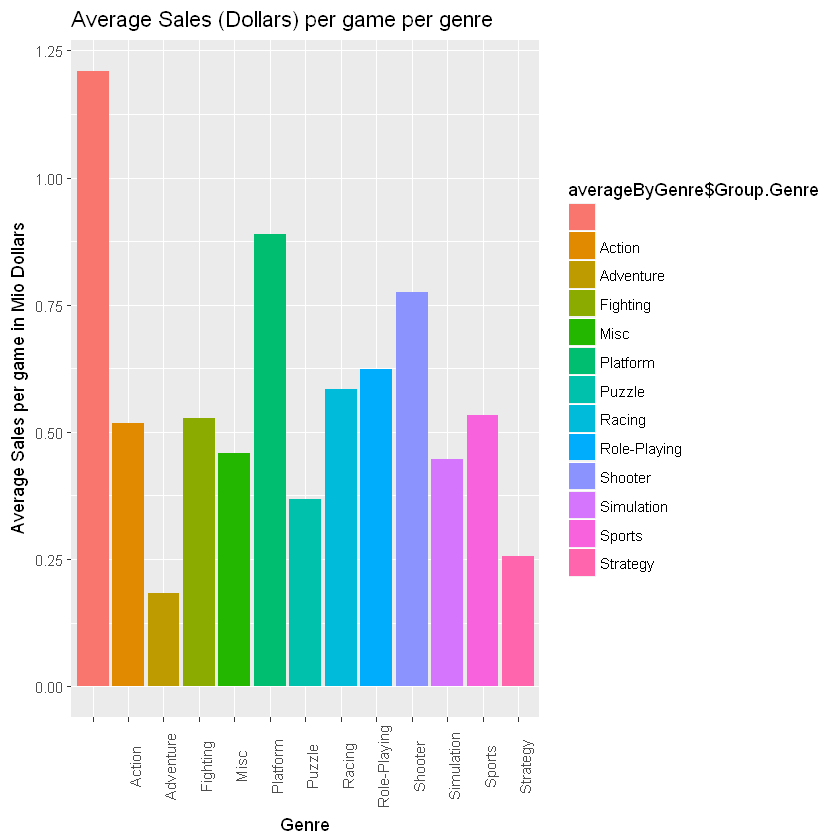

In [39]:
averageByGenre<-aggregate(gamesDataRed$Global_Sales,by=list(Group.Genre=gamesDataRed$Genre),FUN=mean,na.rm=TRUE)
averageByGenre$Group.Genre
averageByGenre$x
ggplot(data = averageByGenre)+
geom_bar(mapping = aes(x = averageByGenre$Group.Genre,y=averageByGenre$x,fill=averageByGenre$Group.Genre),stat="identity")+
theme(axis.text.x = element_text(angle = 90))+
labs(title="Average Sales (Dollars) per game per genre",x="Genre",y="Average Sales per game in Mio Dollars")

#### Position Adjustments in Bar Charts
The plot below visualizes the number of games per genre per year. Note that now the bins represent years. 

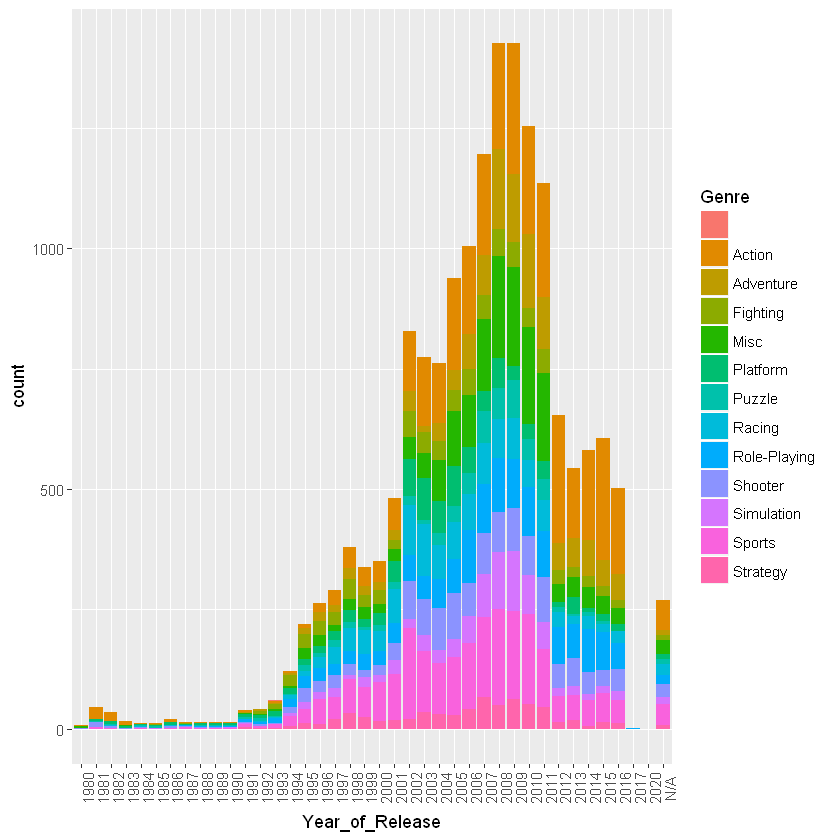

In [40]:
ggplot(data = gamesDataRed) +
geom_bar(mapping = aes(x = Year_of_Release,fill=Genre))+ 
theme(axis.text.x = element_text(angle = 90))

For the plot above the *position*-parameter of *geom_bar()* has not been assigned explicitly. This means, that the default value is applied, which is *'stack'*. However, this parameter, which also belongs to the [basic ggplot2-template parameters](#mainconcepts), can be also set to *'fill'* or *'dodge'*. The corresponding results are shown in the cells below. 

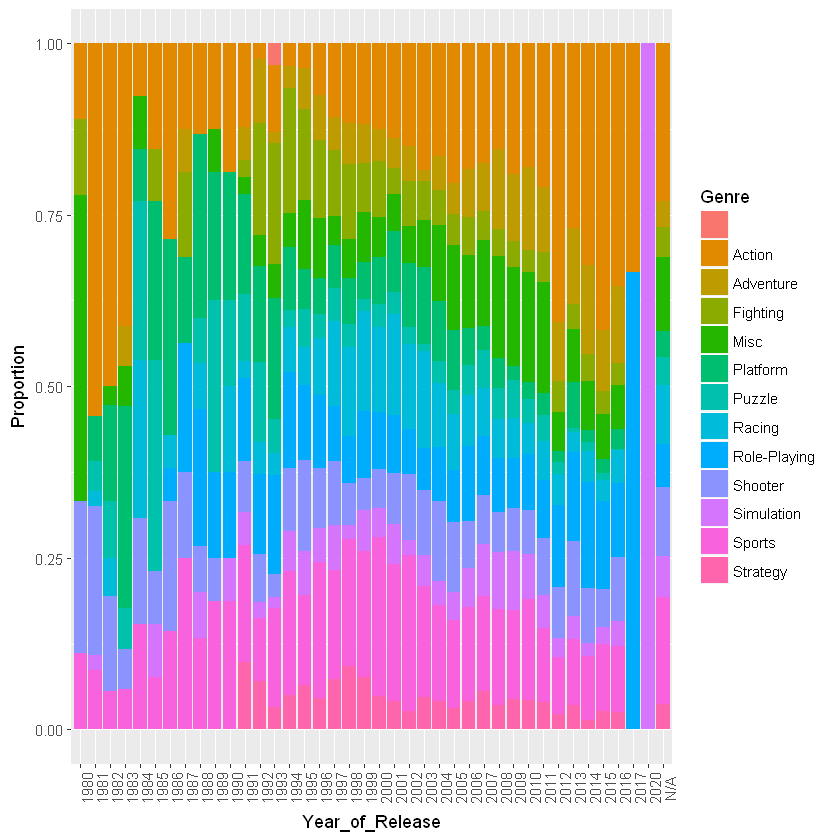

In [36]:
ggplot(data = gamesDataRed) +
geom_bar(mapping = aes(x = Year_of_Release,fill=Genre),position="fill")+ 
theme(axis.text.x = element_text(angle = 90))+ 
labs(y="Proportion")

In order to demonstrate the option *position='dodge'* only a subset of the games-dataset is applied. 

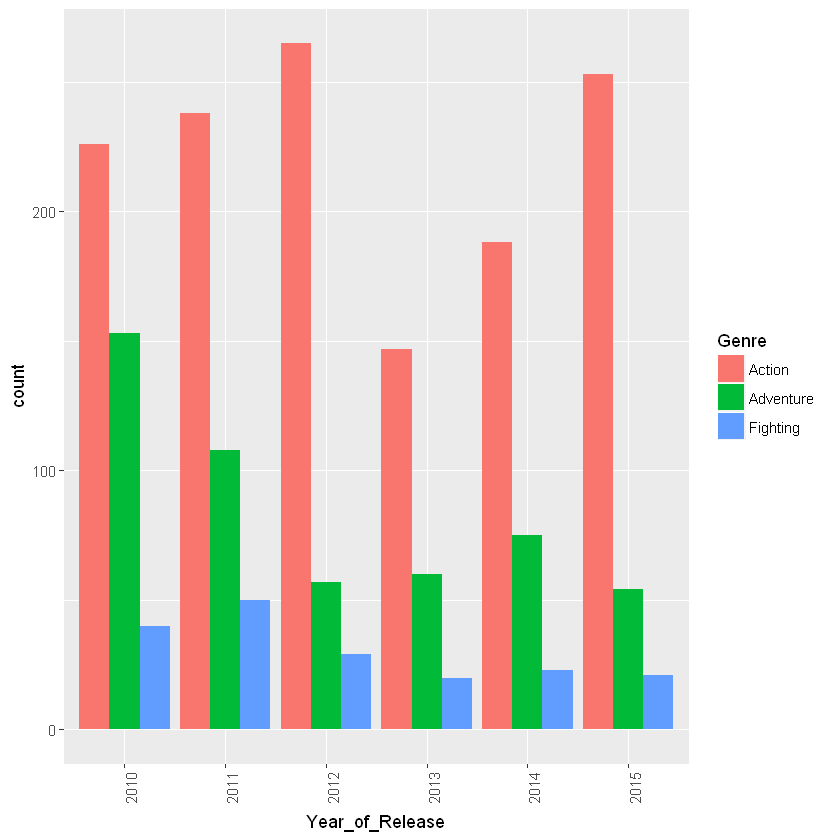

In [58]:
gamesDataRedRed<-gamesDataRed[gamesDataRed$Genre %in% c('Action','Adventure','Fighting') & 
                              gamesDataRed$Year_of_Release %in% 2010:2015 ,]
ggplot(data = gamesDataRedRed) +
geom_bar(mapping = aes(x = Year_of_Release,fill=Genre),position="dodge")+ 
theme(axis.text.x = element_text(angle = 90))

#### Coordinate Systems
ggplot2 provides different coordinate systems. Up to now only the default &lt;COORDINATE_FUNCTION&gt;, which is the  **Cartesian** coordinate system has been applied. Note that &lt;COORDINATE_FUNCTION&gt; is another parameter of the [basic ggplot2-template](#mainconcepts).

Sometimes, plots become clearer if the *x-* and *y-* axis are switched. This can be accomplished by the coordinate function *coord_flip()*: 

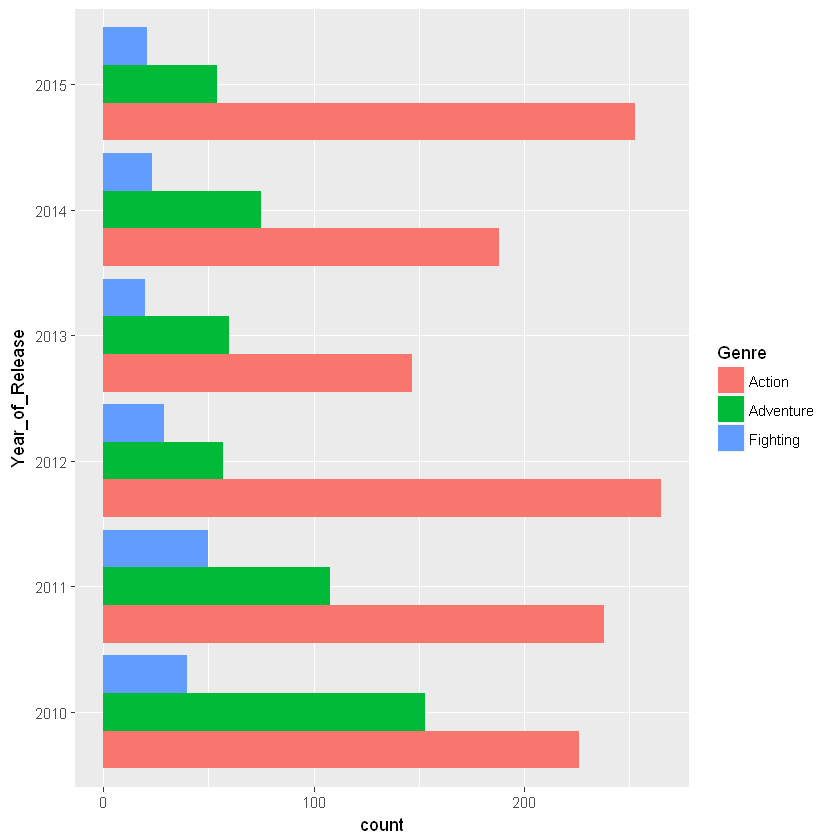

In [62]:
ggplot(data = gamesDataRedRed) +
geom_bar(mapping = aes(x = Year_of_Release,fill=Genre),position="dodge")+ 
coord_flip()

Another coordinate function is *coord_polar()*: 

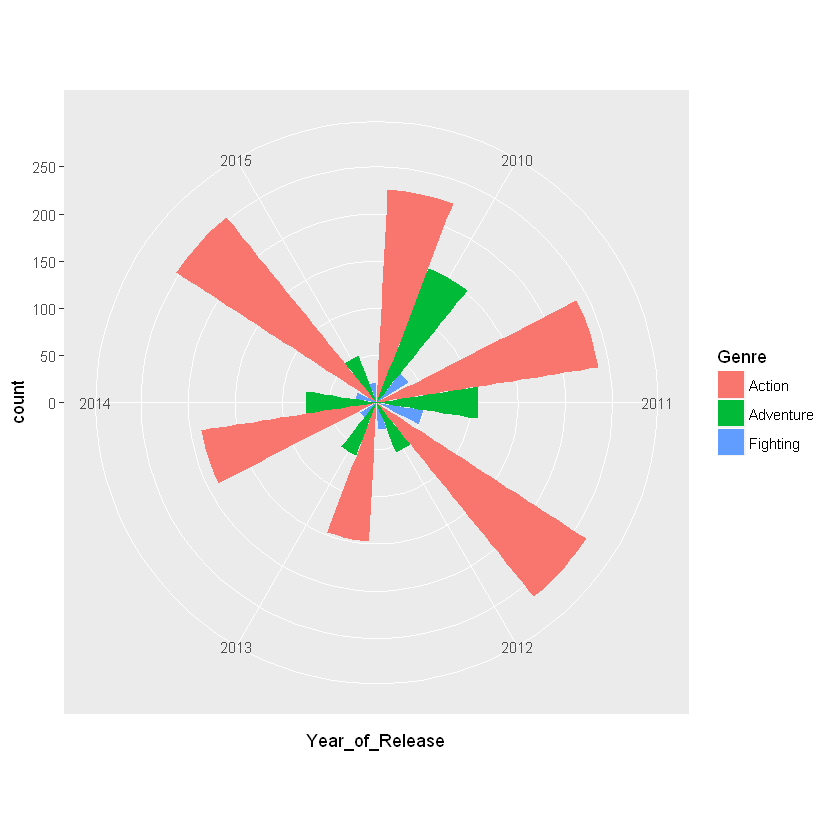

In [63]:
ggplot(data = gamesDataRedRed) +
geom_bar(mapping = aes(x = Year_of_Release,fill=Genre),position="dodge")+ 
coord_polar()

### Box Plots

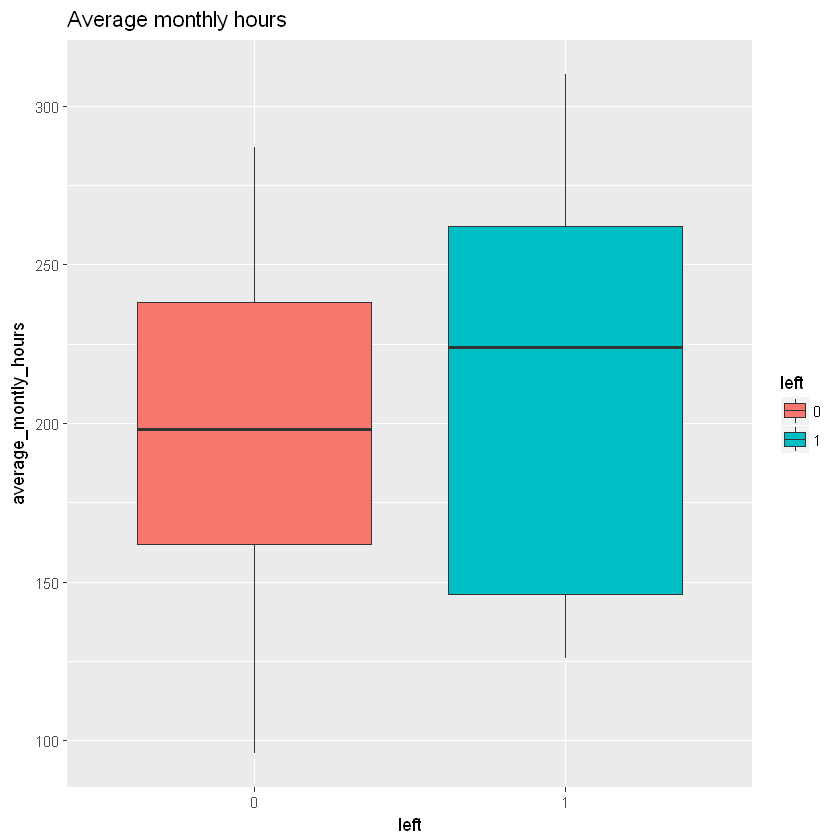

In [59]:
#ggplot(data = gamesDataRed) + geom_boxplot(mapping=aes(x=Genre, y=Global_Sales,color=Genre)) + coord_flip()
ggplot(data = hrData) + geom_boxplot(mapping=aes(x=left, y=average_montly_hours,fill=left))+
labs(title="Average monthly hours")

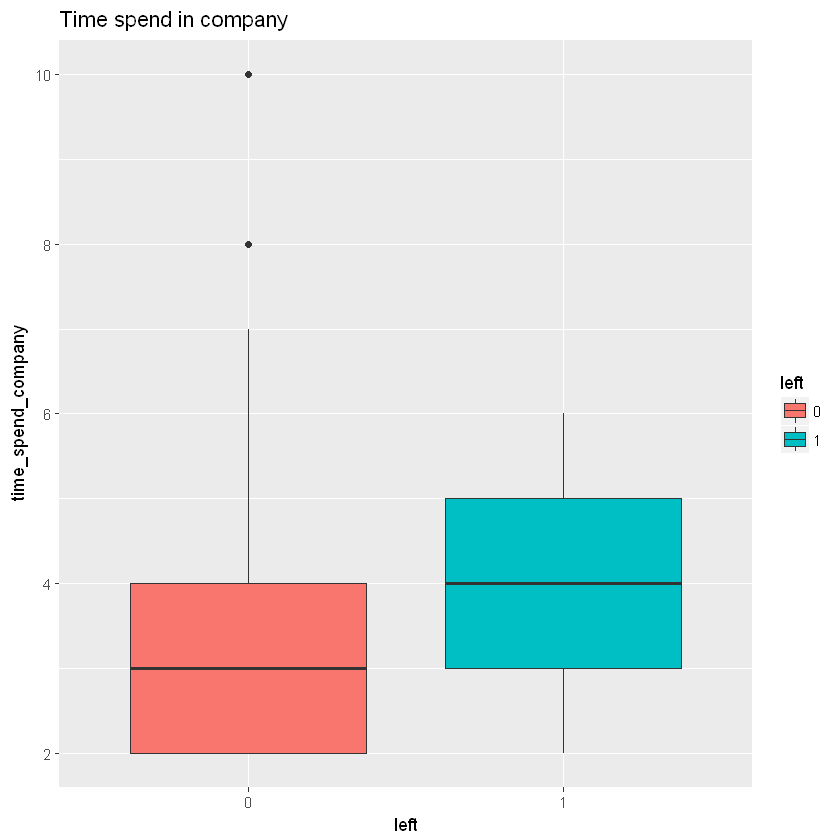

In [114]:
ggplot(data = hrData) + 
geom_boxplot(mapping=aes(x=left, y=time_spend_company,fill=left))+
labs(title="Time spend in company")

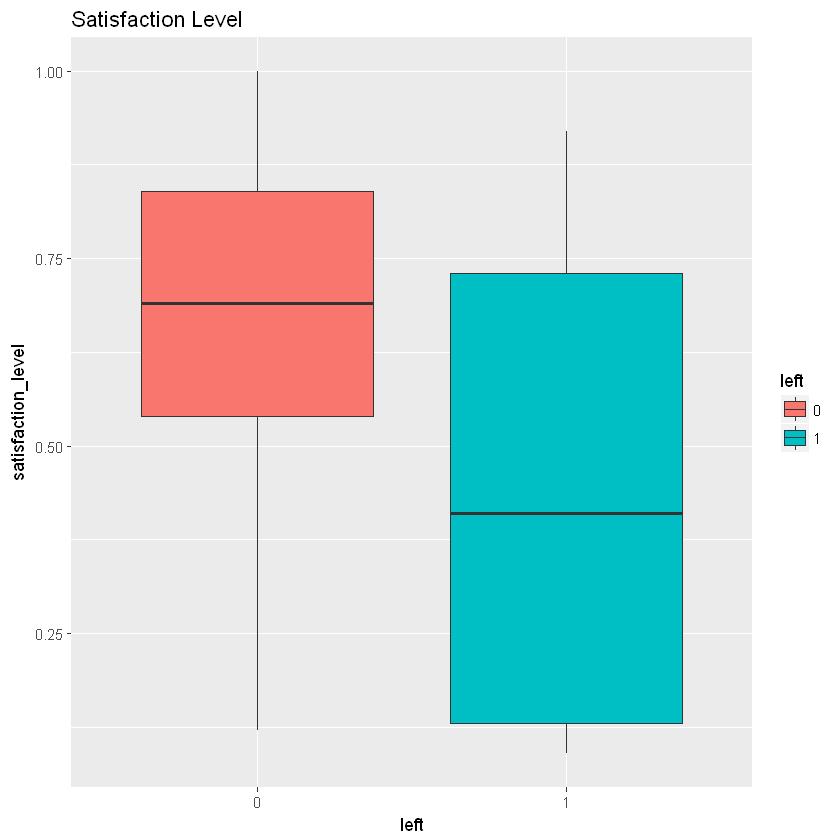

In [115]:
ggplot(data = hrData) + 
geom_boxplot(mapping=aes(x=left, y=satisfaction_level,fill=left))+
labs(title="Satisfaction Level")

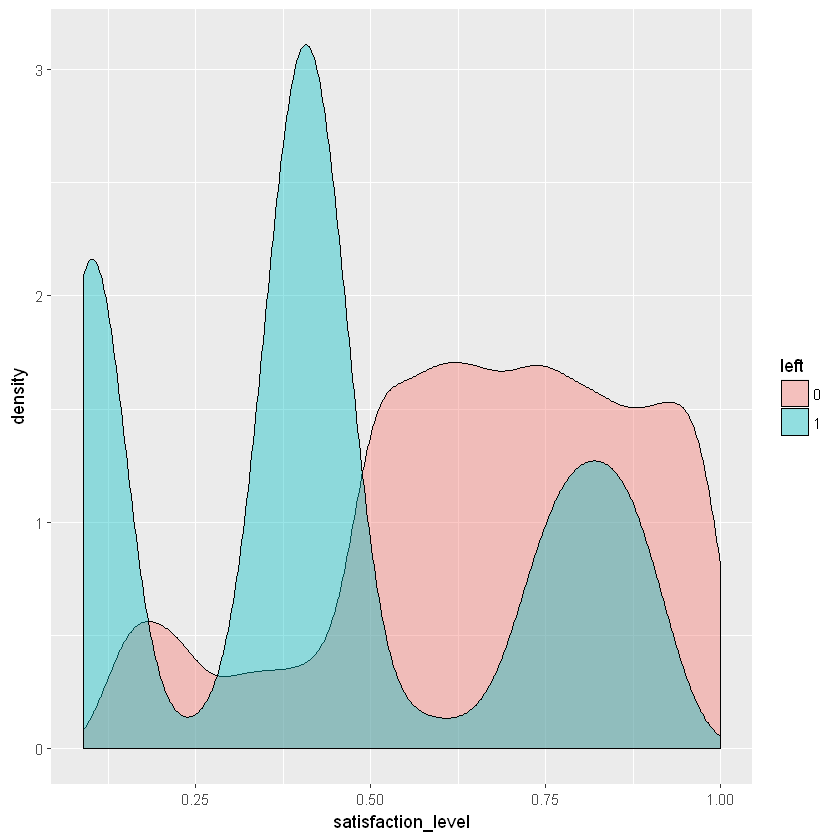

In [119]:
#gamesDataRed$Genre
ggplot(data = hrData) + geom_density(mapping=aes(x=satisfaction_level,fill=left),alpha=.4) #+facet_wrap(~ Genre ,ncol=1)

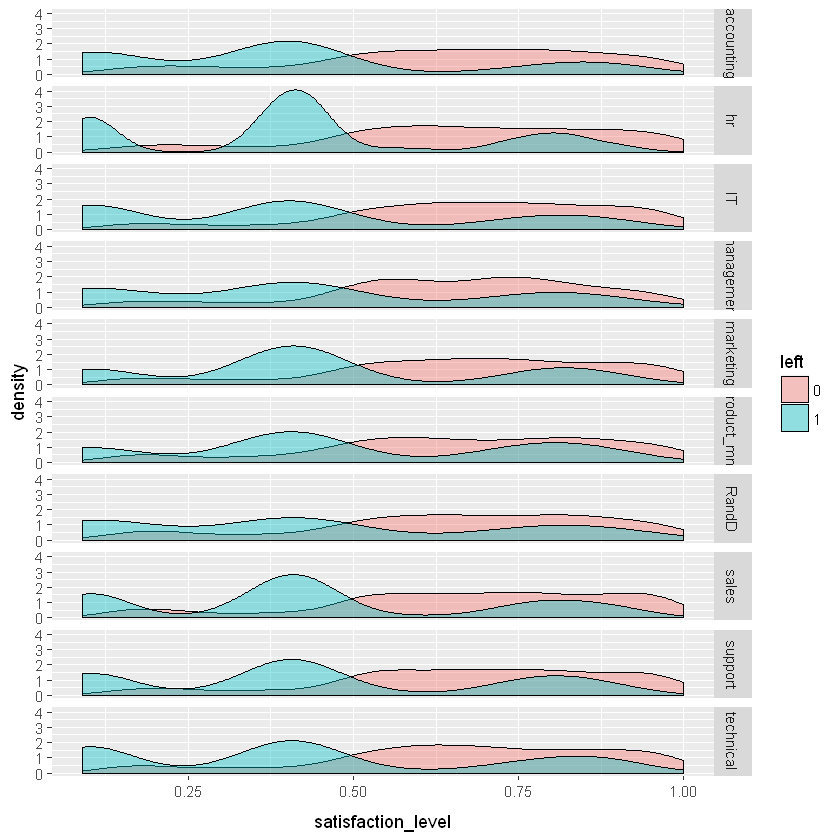

In [138]:
ggplot(data = hrData) + geom_density(mapping=aes(x=satisfaction_level,fill=left),alpha=.4)+ facet_grid(sales~.)

In [124]:
mytable <- xtabs(~ left+salary, data=hrData)
mytable

    salary
left high  low medium
   0 1155 5144   5129
   1   82 2172   1317

In [130]:
probtable <- addmargins(prop.table(mytable))
probtable

,high,low,medium,Sum
0,0.077005134,0.3429562,0.34195613,0.7619175
1,0.005467031,0.1448097,0.08780585,0.2380825
Sum,0.082472165,0.4877659,0.42976198,1.0000000


### Statistical Summary

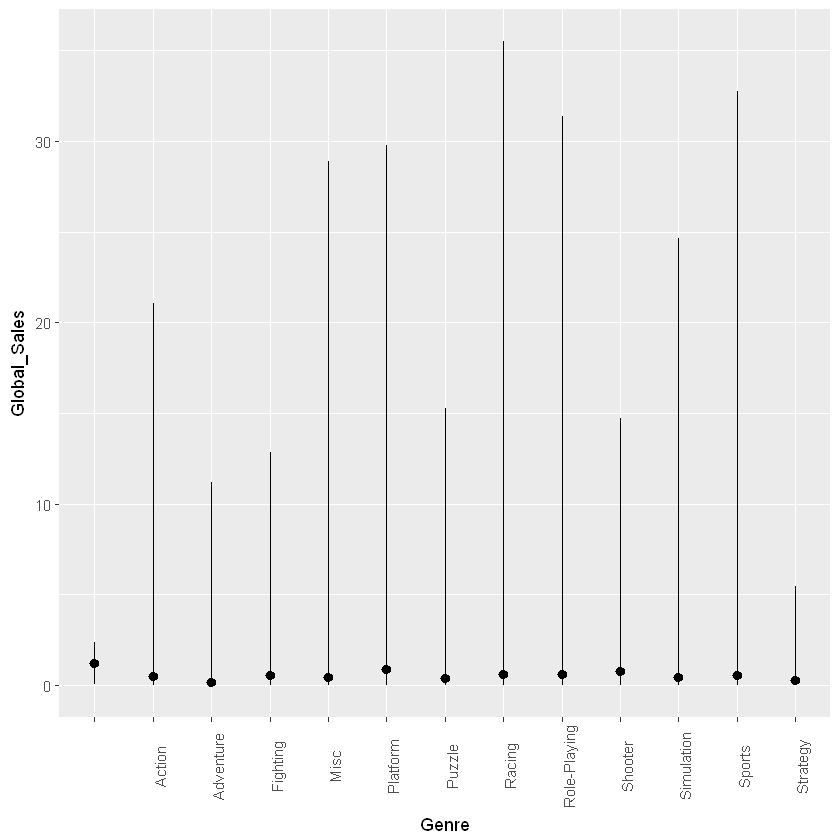

In [78]:
ggplot(data = gamesDataRed) +
  stat_summary(
    mapping = aes(x = Genre, y = Global_Sales),
    fun.ymin = min,
    fun.ymax = max,
    fun.y = mean
  )+theme(axis.text.x = element_text(angle = 90))

## Cells, not assigned yet

Using Country as id variables


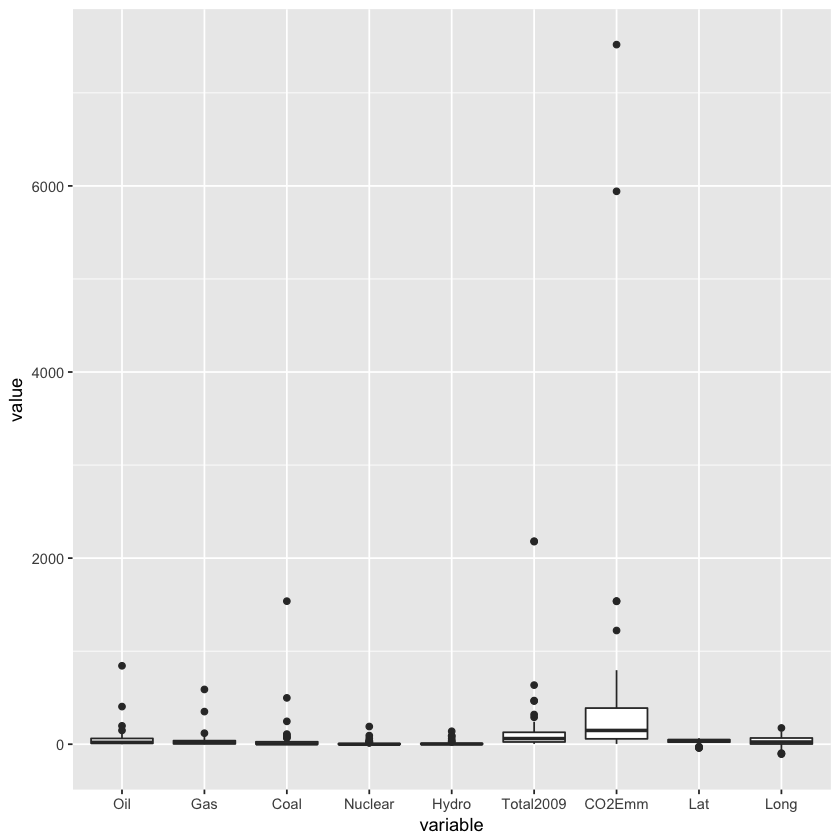

In [83]:
library(reshape2)
ggplot(melt(energyData), aes(variable,value)) + geom_boxplot()